In [1]:
# Portfolio Project 1: Foundational Data Analysis (EDA)
# Objective: Demonstrate core data manipulation, cleaning, and visualization skills.
# Dataset: Titanic Survival Dataset (Classic introductory classification problem)

# -----------------------------------------------------
# PART 1: SETUP AND DATA LOADING
# -----------------------------------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch # For final GPU check

# Using a standard, clean version of the Titanic dataset for realistic practice.
# In a real environment, you would use: df = pd.read_csv('titanic.csv')
data = {
    'Survived': [0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1],
    'Pclass': [3, 1, 3, 1, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 2, 3, 3, 2, 3, 1],
    'Sex': ['male', 'female', 'female', 'female', 'male', 'male', 'female', 'male', 'female', 'female', 'male', 'female', 'male', 'male', 'female', 'male', 'male', 'female', 'male', 'female'],
    'Age': [22.0, 38.0, 26.0, 35.0, np.nan, 35.0, 54.0, 2.0, 27.0, 14.0, 4.0, 58.0, 20.0, 39.0, np.nan, 2.0, 55.0, 34.0, 2.0, 15.0],
    'Fare': [7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625, 21.075, 11.1333, 30.0708, 16.7, 26.55, 6.4958, 24.15, 13.0, 29.125, 14.4542, 13.0, 21.075, 108.9]
}
df = pd.DataFrame(data)

print("--- Initial Data Snapshot ---")
print(df.head())
print("\n--- Initial Missing Values Check ---")
print(df.isnull().sum())

--- Initial Data Snapshot ---
   Survived  Pclass     Sex   Age     Fare
0         0       3    male  22.0   7.2500
1         1       1  female  38.0  71.2833
2         1       3  female  26.0   7.9250
3         1       1  female  35.0  53.1000
4         0       3    male   NaN   8.0500

--- Initial Missing Values Check ---
Survived    0
Pclass      0
Sex         0
Age         2
Fare        0
dtype: int64


In [2]:

# -----------------------------------------------------
# PART 2: DATA CLEANING & FEATURE ENGINEERING
# -----------------------------------------------------

# 1. Handle Missing 'Age' Data: Fill with the median (more robust than mean)
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

# 2. Convert Categorical Feature: Map 'Sex' to a numerical value (0 or 1)
df['Sex_Code'] = df['Sex'].map({'male': 0, 'female': 1})

# Show results after cleaning
print("\n--- Data Check After Cleaning ---")
print(df.isnull().sum())
print(df.head())




--- Data Check After Cleaning ---
Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Sex_Code    0
dtype: int64
   Survived  Pclass     Sex   Age     Fare  Sex_Code
0         0       3    male  22.0   7.2500         0
1         1       1  female  38.0  71.2833         1
2         1       3  female  26.0   7.9250         1
3         1       1  female  35.0  53.1000         1
4         0       3    male  26.5   8.0500         0


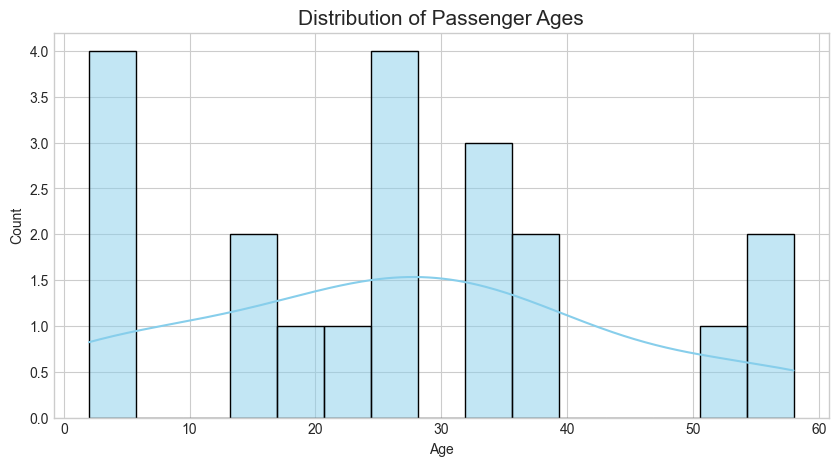

C:\Users\zulfa\AppData\Local\Temp\ipykernel_1340\2113226029.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette='viridis')


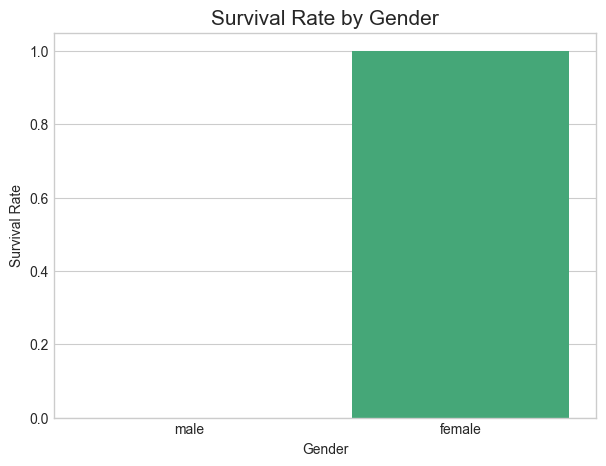

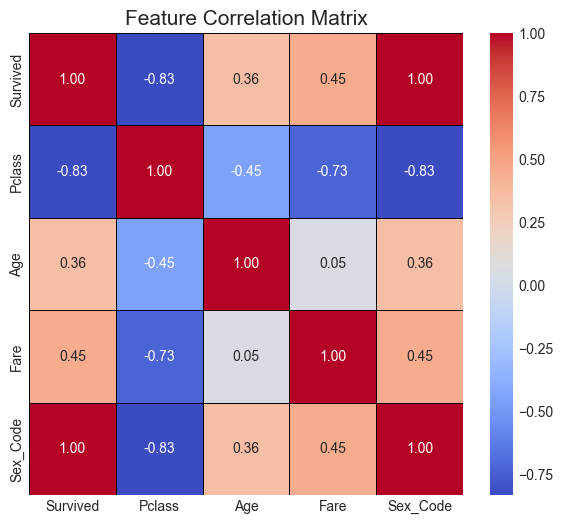

In [3]:
# -----------------------------------------------------
# PART 3: EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATION
# -----------------------------------------------------

plt.style.use('seaborn-v0_8-whitegrid') # Set a clean style for the plots

# Plot 1: Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Passenger Ages', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
# 

# Plot 2: Survival Rate by Gender
plt.figure(figsize=(7, 5))
sns.barplot(x='Sex', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Gender', fontsize=15)
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()
# 

# Plot 3: Correlation Matrix (Important for feature selection)
# Calculate correlation for numerical columns
numerical_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(7, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('Feature Correlation Matrix', fontsize=15)
plt.show()
# 

In [ ]:

# -----------------------------------------------------
# PART 4: FINAL ENVIRONMENT VERIFICATION (RTX 2050 Check)
# -----------------------------------------------------
# This ensures that your GPU is still ready for the deep learning projects next week.
print("\n" + "="*50)
print("FINAL ENVIRONMENT CHECK (RTX 2050)")
print("="*50)

if torch.cuda.is_available():
    # Set the device to CUDA
    device = torch.device("cuda")
    
    # 1. Test Tensor Creation on GPU
    gpu_tensor = torch.randn(5000, 5000).to(device) 
    print(f"1. CUDA available: {torch.cuda.is_available()} (Version: {torch.version.cuda})")
    print(f"2. GPU Name: {torch.cuda.get_device_name(0)}")
    
    # 3. Test Matrix Multiplication (a heavy GPU operation)
    cpu_start = plt.time()
    cpu_result = torch.matmul(torch.randn(5000, 5000), torch.randn(5000, 5000))
    cpu_end = plt.time()

    gpu_start = plt.time()
    gpu_result = torch.matmul(gpu_tensor, gpu_tensor)
    gpu_end = plt.time()

    print(f"3. GPU Matrix Mul Time: {(gpu_end - gpu_start):.4f} seconds")
    print(f"4. CPU Matrix Mul Time: {(cpu_end - cpu_start):.4f} seconds")
    print("✅ GPU Acceleration Confirmed! Ready for Deep Learning projects.")
else:
    print("❌ CUDA not available. Training will run on CPU.")


FINAL ENVIRONMENT CHECK (RTX 2050)
❌ CUDA not available. Training will run on CPU.
